In [6]:
import sys
assert sys.version_info >= (3, 5)
import time
import warnings
import os

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model

import seaborn as sns

import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from scipy.stats import pearsonr
warnings.filterwarnings("ignore")

#Options and parameters.
dataFileName = "country_vaccinations.csv"

#Load the file using pandas
df = pd.read_csv(dataFileName)
print(df.head())

#Establish the helper functions
def showDescriptiveStats(dataFrame, featureName):
    print(featureName, " | set stats: ")
    print(dataFrame[featureName].describe())
    print('\n')
    return None

#Establish the helper functions
def clearNullsWithMean(dataFrame, featureName):
    dataFrame[featureName].fillna(dataFrame[featureName].mean(), inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None

def clearNullsWithZero(dataFrame, featureName):
    dataFrame[featureName].fillna(0, inplace = True)
    dataFrame.fillna(0, inplace = True)
    return None


       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

# Descriptive Statistics

In [9]:
#Split the data set into a train and test set.
train_df, test_df = train_test_split(df,shuffle = True, test_size = 0.95, random_state=17)

#Display descriptive statistics of the data set.
features = list(train_df.columns)
featuresWithData = [
    'total_vaccinations',
    'people_vaccinated',
    'people_fully_vaccinated',
    'daily_vaccinations_raw',
    'daily_vaccinations',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'daily_vaccinations_per_million'
]
for feat in featuresWithData:
    print(feat)
    showDescriptiveStats(train_df, feat)


total_vaccinations
total_vaccinations  | set stats: 
count    7.830000e+02
mean     3.415374e+06
std      2.144612e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.245500e+04
75%      7.173505e+05
max      2.977340e+08
Name: total_vaccinations, dtype: float64


people_vaccinated
people_vaccinated  | set stats: 
count    7.830000e+02
mean     1.829427e+06
std      1.125920e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.923900e+04
75%      4.773385e+05
max      1.485629e+08
Name: people_vaccinated, dtype: float64


people_fully_vaccinated
people_fully_vaccinated  | set stats: 
count    7.830000e+02
mean     8.612014e+05
std      7.362575e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.882050e+04
max      1.073465e+08
Name: people_fully_vaccinated, dtype: float64


daily_vaccinations_raw
daily_vaccinations_raw  | set stats: 
count    7.830000e+02
mean     6.841372e+04
std      4.227979e+05
min      0.000000e+00
25%      0.000000e+00
5

# Linear Regression Scatterplot

R-Squared:  0.018302533211747685


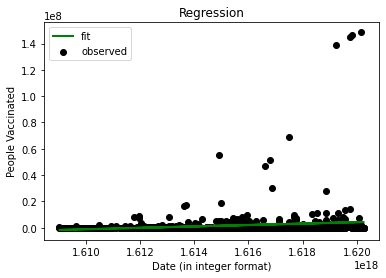

In [11]:
df.shape
df.isna().sum()

#Convert dates into the date type and then into the integer type.
x = train_df['date']
x = [pd.to_datetime(d).value for d in x]

#Clean the set of nulls/NaNs
clearNullsWithZero(df, 'date')
clearNullsWithZero(df, 'people_vaccinated')

#Reshape the Y set.
y = train_df['people_vaccinated']
x2 = np.array(x).reshape(-1,1)
#print(x2)

#Load the linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(x2,y)

#display the R-Squared score
r_sq = model.score(x2, y)
print("R-Squared: ", r_sq)

#Create and show the scatter plot
plt.scatter(x2, y, color='black', label='observed')
plt.plot(x2, model.predict(x2), label='fit', color='Green', linewidth=2)
plt.xlabel('Date (in integer format)')
plt.ylabel('People Vaccinated')
plt.title('Regression')
plt.legend(loc='best')
plt.show()


# Boxplot of Various Attributes

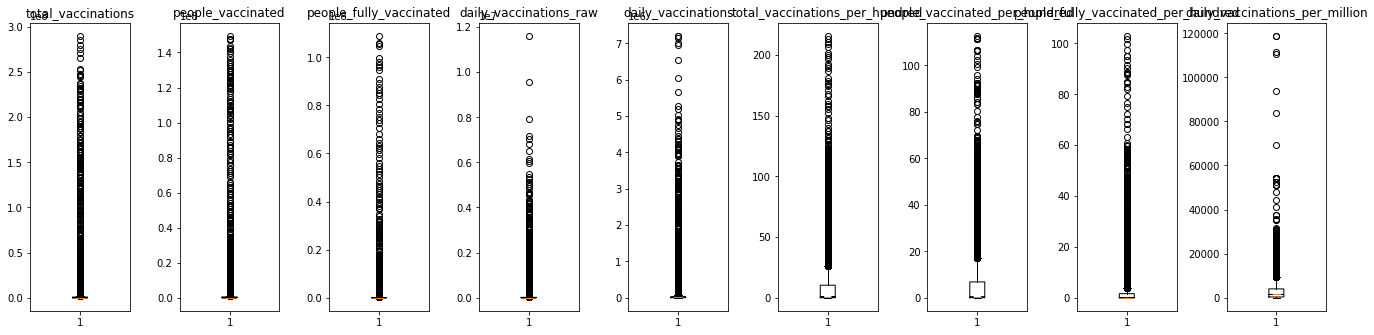

In [14]:
#Display boxplots
fig, axs = plt.subplots(1, len(featuresWithData))
xAxis = 0
for dataset in featuresWithData:
    axs[xAxis].boxplot(test_df[dataset], notch = True)
    axs[xAxis].set_title(dataset)
    xAxis += 1
fig.subplots_adjust(left=0, right=3, bottom=0, top=1, hspace=0.5, wspace=0.5) #adjust fig for increased spacing
plt.show() #Show the boxplots
